In [11]:
from data_loader import WireDataset
import torch
import math
import numpy as np
from torch.utils.data import DataLoader
from ML import Net
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torchmetrics.classification import F1Score, MulticlassRecall, MulticlassConfusionMatrix


In [2]:
dataset = WireDataset("Input_Data.csv")
# TODO add to device

if torch.cuda.is_available():
    device = "cuda"
else:
    device = "cpu"

In [3]:
generator = torch.Generator().manual_seed(4)

train_fraction = math.floor(len(dataset)*0.7)
test_fraction = len(dataset) - train_fraction

test_data_ind, train_data_ind = torch.utils.data.random_split(dataset, [test_fraction, train_fraction], generator = generator)

dl_train = DataLoader(train_data_ind, batch_size=20, shuffle=True) #todevice
dl_test = DataLoader(test_data_ind, batch_size=20, shuffle=True) #todevice

net = Net() #todevice
#optimizer = torch.optim.SGD(net.parameters(), lr=0.0001)

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

num_epochs = 100

In [4]:
epochs_F1List = np.zeros((2, 100))
F1= F1Score("multiclass", num_classes = 6)
f1_max = 0

In [5]:
for epoch in range(num_epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    net.train()
    for i, data in enumerate(dl_train, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 10 == 9:    # print every 30 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 10:.3f}')
            running_loss = 0.0
    
    predictions_list = [] #list for predictions (predicted number of label)
    values_list = []      #list for values (actual number of label)
    f1_list = np.zeros(len(dl_test))
    net.eval()
    running_loss = 0.0
    for i, data in enumerate(dl_test, 0):
        inputs, labels = data
        # forward + backward + optimize
        outputs = net(inputs)
        f1_list[i] = F1(outputs, labels).item()
        if i % 10 == 9:    # print every 10 mini-batches
            print(f"[batch {i}, size: {dl_test.batch_size}] F1 score: {f1_list[i]}")
    
    epochs_F1List[0][epoch] = f1_list.mean()
    epochs_F1List[1][epoch] = f1_list.std()
    
    if epochs_F1List[0][epoch] > f1_max:
        torch.save(net.state_dict(), "model.ebr")
        f1_max=epochs_F1List[0][epoch]

[1,    10] loss: 1.851
[1,    20] loss: 1.836
[1,    30] loss: 1.807
[1,    40] loss: 1.781
[1,    50] loss: 1.756
[1,    60] loss: 1.727
[1,    70] loss: 1.694
[1,    80] loss: 1.670
[1,    90] loss: 1.640
[1,   100] loss: 1.636
[1,   110] loss: 1.601
[1,   120] loss: 1.602
[batch 9, size: 20] F1 score: 0.30000001192092896
[batch 19, size: 20] F1 score: 0.6000000238418579
[batch 29, size: 20] F1 score: 0.5
[batch 39, size: 20] F1 score: 0.30000001192092896
[batch 49, size: 20] F1 score: 0.6000000238418579


OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detec

[2,    10] loss: 1.542
[2,    20] loss: 1.526
[2,    30] loss: 1.500
[2,    40] loss: 1.418
[2,    50] loss: 1.411
[2,    60] loss: 1.302
[2,    70] loss: 1.272
[2,    80] loss: 1.356
[2,    90] loss: 1.364
[2,   100] loss: 1.319
[2,   110] loss: 1.250
[2,   120] loss: 1.381
[batch 9, size: 20] F1 score: 0.4000000059604645
[batch 19, size: 20] F1 score: 0.5
[batch 29, size: 20] F1 score: 0.6000000238418579
[batch 39, size: 20] F1 score: 0.550000011920929
[batch 49, size: 20] F1 score: 0.3499999940395355


OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detec

[3,    10] loss: 1.254
[3,    20] loss: 1.238
[3,    30] loss: 1.273
[3,    40] loss: 1.218
[3,    50] loss: 1.191
[3,    60] loss: 1.205
[3,    70] loss: 1.295
[3,    80] loss: 1.184
[3,    90] loss: 1.344
[3,   100] loss: 1.192
[3,   110] loss: 1.317
[3,   120] loss: 1.287
[batch 9, size: 20] F1 score: 0.6499999761581421
[batch 19, size: 20] F1 score: 0.44999998807907104
[batch 29, size: 20] F1 score: 0.6499999761581421
[batch 39, size: 20] F1 score: 0.75
[batch 49, size: 20] F1 score: 0.5


OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detec

[4,    10] loss: 1.149
[4,    20] loss: 1.217
[4,    30] loss: 1.226
[4,    40] loss: 1.237
[4,    50] loss: 1.217
[4,    60] loss: 1.290
[4,    70] loss: 1.251
[4,    80] loss: 1.331
[4,    90] loss: 1.265
[4,   100] loss: 1.171
[4,   110] loss: 1.216
[4,   120] loss: 1.229
[batch 9, size: 20] F1 score: 0.550000011920929
[batch 19, size: 20] F1 score: 0.6000000238418579
[batch 29, size: 20] F1 score: 0.8500000238418579
[batch 39, size: 20] F1 score: 0.4000000059604645
[batch 49, size: 20] F1 score: 0.550000011920929


OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detec

[5,    10] loss: 1.134
[5,    20] loss: 1.238
[5,    30] loss: 1.199
[5,    40] loss: 1.301
[5,    50] loss: 1.271
[5,    60] loss: 1.267
[5,    70] loss: 1.324
[5,    80] loss: 1.251
[5,    90] loss: 1.304
[5,   100] loss: 1.107
[5,   110] loss: 1.167
[5,   120] loss: 1.203
[batch 9, size: 20] F1 score: 0.75
[batch 19, size: 20] F1 score: 0.699999988079071
[batch 29, size: 20] F1 score: 0.550000011920929
[batch 39, size: 20] F1 score: 0.44999998807907104
[batch 49, size: 20] F1 score: 0.800000011920929


OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detec

[6,    10] loss: 1.192
[6,    20] loss: 1.228
[6,    30] loss: 1.260
[6,    40] loss: 1.207
[6,    50] loss: 1.284
[6,    60] loss: 1.144
[6,    70] loss: 1.283
[6,    80] loss: 1.218
[6,    90] loss: 1.151
[6,   100] loss: 1.145
[6,   110] loss: 1.235
[6,   120] loss: 1.221
[batch 9, size: 20] F1 score: 0.6499999761581421
[batch 19, size: 20] F1 score: 0.550000011920929
[batch 29, size: 20] F1 score: 0.6000000238418579
[batch 39, size: 20] F1 score: 0.6499999761581421
[batch 49, size: 20] F1 score: 0.6000000238418579


OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detec

[7,    10] loss: 1.134
[7,    20] loss: 1.276
[7,    30] loss: 1.252
[7,    40] loss: 1.171
[7,    50] loss: 1.211
[7,    60] loss: 1.088
[7,    70] loss: 1.210
[7,    80] loss: 1.361
[7,    90] loss: 1.200
[7,   100] loss: 1.284
[7,   110] loss: 1.144
[7,   120] loss: 1.145
[batch 9, size: 20] F1 score: 0.550000011920929
[batch 19, size: 20] F1 score: 0.550000011920929
[batch 29, size: 20] F1 score: 0.550000011920929
[batch 39, size: 20] F1 score: 0.5
[batch 49, size: 20] F1 score: 0.5


OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detec

[8,    10] loss: 1.181
[8,    20] loss: 1.206
[8,    30] loss: 1.157
[8,    40] loss: 1.198
[8,    50] loss: 1.165
[8,    60] loss: 1.293
[8,    70] loss: 1.215
[8,    80] loss: 1.314
[8,    90] loss: 1.183
[8,   100] loss: 1.170
[8,   110] loss: 1.179
[8,   120] loss: 1.172
[batch 9, size: 20] F1 score: 0.3499999940395355
[batch 19, size: 20] F1 score: 0.44999998807907104
[batch 29, size: 20] F1 score: 0.3499999940395355
[batch 39, size: 20] F1 score: 0.44999998807907104
[batch 49, size: 20] F1 score: 0.6000000238418579


OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detec

[9,    10] loss: 1.135
[9,    20] loss: 1.247
[9,    30] loss: 1.228
[9,    40] loss: 1.149
[9,    50] loss: 1.220
[9,    60] loss: 1.356
[9,    70] loss: 1.101
[9,    80] loss: 1.238
[9,    90] loss: 1.196
[9,   100] loss: 1.223
[9,   110] loss: 1.158
[9,   120] loss: 1.134
[batch 9, size: 20] F1 score: 0.4000000059604645
[batch 19, size: 20] F1 score: 0.6000000238418579
[batch 29, size: 20] F1 score: 0.550000011920929
[batch 39, size: 20] F1 score: 0.6000000238418579
[batch 49, size: 20] F1 score: 0.75


OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detec

[10,    10] loss: 1.231
[10,    20] loss: 1.117
[10,    30] loss: 1.180
[10,    40] loss: 1.275
[10,    50] loss: 1.123
[10,    60] loss: 1.199
[10,    70] loss: 1.187
[10,    80] loss: 1.291
[10,    90] loss: 1.251
[10,   100] loss: 1.276
[10,   110] loss: 1.023
[10,   120] loss: 1.114
[batch 9, size: 20] F1 score: 0.5
[batch 19, size: 20] F1 score: 0.44999998807907104
[batch 29, size: 20] F1 score: 0.550000011920929
[batch 39, size: 20] F1 score: 0.5
[batch 49, size: 20] F1 score: 0.4000000059604645


OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detec

[11,    10] loss: 1.279
[11,    20] loss: 1.126
[11,    30] loss: 1.182
[11,    40] loss: 1.220
[11,    50] loss: 1.149
[11,    60] loss: 1.230
[11,    70] loss: 1.119
[11,    80] loss: 1.269
[11,    90] loss: 1.142
[11,   100] loss: 1.104
[11,   110] loss: 1.205
[11,   120] loss: 1.099
[batch 9, size: 20] F1 score: 0.699999988079071
[batch 19, size: 20] F1 score: 0.550000011920929
[batch 29, size: 20] F1 score: 0.550000011920929
[batch 39, size: 20] F1 score: 0.550000011920929
[batch 49, size: 20] F1 score: 0.550000011920929


OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detec

[12,    10] loss: 1.005
[12,    20] loss: 0.997
[12,    30] loss: 1.164
[12,    40] loss: 1.158
[12,    50] loss: 1.089
[12,    60] loss: 1.146
[12,    70] loss: 1.160
[12,    80] loss: 1.136
[12,    90] loss: 1.232
[12,   100] loss: 1.018
[12,   110] loss: 1.029
[12,   120] loss: 1.090
[batch 9, size: 20] F1 score: 0.699999988079071
[batch 19, size: 20] F1 score: 0.550000011920929
[batch 29, size: 20] F1 score: 0.6000000238418579
[batch 39, size: 20] F1 score: 0.5
[batch 49, size: 20] F1 score: 0.6499999761581421


OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detec

[13,    10] loss: 0.940
[13,    20] loss: 1.006
[13,    30] loss: 1.040
[13,    40] loss: 1.043
[13,    50] loss: 0.978
[13,    60] loss: 1.000
[13,    70] loss: 1.051
[13,    80] loss: 0.944
[13,    90] loss: 0.875
[13,   100] loss: 0.870
[13,   110] loss: 0.937
[13,   120] loss: 0.872
[batch 9, size: 20] F1 score: 0.75
[batch 19, size: 20] F1 score: 0.550000011920929
[batch 29, size: 20] F1 score: 0.75
[batch 39, size: 20] F1 score: 0.699999988079071
[batch 49, size: 20] F1 score: 0.6000000238418579


OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detec

[14,    10] loss: 0.818
[14,    20] loss: 0.813
[14,    30] loss: 0.823
[14,    40] loss: 0.826
[14,    50] loss: 0.896
[14,    60] loss: 0.931
[14,    70] loss: 0.881
[14,    80] loss: 0.888
[14,    90] loss: 0.834
[14,   100] loss: 0.939
[14,   110] loss: 0.852
[14,   120] loss: 0.777
[batch 9, size: 20] F1 score: 0.800000011920929
[batch 19, size: 20] F1 score: 0.8500000238418579
[batch 29, size: 20] F1 score: 0.6499999761581421
[batch 39, size: 20] F1 score: 0.75
[batch 49, size: 20] F1 score: 0.949999988079071


OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detec

[15,    10] loss: 0.719
[15,    20] loss: 0.726
[15,    30] loss: 0.811
[15,    40] loss: 0.725
[15,    50] loss: 0.800
[15,    60] loss: 0.836
[15,    70] loss: 0.802
[15,    80] loss: 0.830
[15,    90] loss: 0.946
[15,   100] loss: 0.752
[15,   110] loss: 0.850
[15,   120] loss: 0.955
[batch 9, size: 20] F1 score: 0.699999988079071
[batch 19, size: 20] F1 score: 0.8999999761581421
[batch 29, size: 20] F1 score: 0.800000011920929
[batch 39, size: 20] F1 score: 0.800000011920929
[batch 49, size: 20] F1 score: 0.8500000238418579


OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detec

[16,    10] loss: 0.734
[16,    20] loss: 0.840
[16,    30] loss: 0.902
[16,    40] loss: 1.021
[16,    50] loss: 0.772
[16,    60] loss: 0.720
[16,    70] loss: 0.761
[16,    80] loss: 0.699
[16,    90] loss: 0.730
[16,   100] loss: 0.672
[16,   110] loss: 0.704
[16,   120] loss: 0.674
[batch 9, size: 20] F1 score: 0.8500000238418579
[batch 19, size: 20] F1 score: 0.8500000238418579
[batch 29, size: 20] F1 score: 0.8500000238418579
[batch 39, size: 20] F1 score: 0.6499999761581421
[batch 49, size: 20] F1 score: 0.800000011920929


OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detec

[17,    10] loss: 0.692
[17,    20] loss: 0.697
[17,    30] loss: 0.827
[17,    40] loss: 0.696
[17,    50] loss: 0.695
[17,    60] loss: 0.639
[17,    70] loss: 0.825
[17,    80] loss: 0.704
[17,    90] loss: 0.614
[17,   100] loss: 0.692
[17,   110] loss: 0.651
[17,   120] loss: 0.694
[batch 9, size: 20] F1 score: 0.699999988079071
[batch 19, size: 20] F1 score: 0.8500000238418579
[batch 29, size: 20] F1 score: 0.800000011920929
[batch 39, size: 20] F1 score: 0.8500000238418579
[batch 49, size: 20] F1 score: 0.75


OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detec

[18,    10] loss: 0.694
[18,    20] loss: 0.650
[18,    30] loss: 0.731
[18,    40] loss: 0.513
[18,    50] loss: 0.731
[18,    60] loss: 0.597
[18,    70] loss: 0.718
[18,    80] loss: 0.656
[18,    90] loss: 0.754
[18,   100] loss: 0.637
[18,   110] loss: 0.595
[18,   120] loss: 0.561
[batch 9, size: 20] F1 score: 0.800000011920929
[batch 19, size: 20] F1 score: 0.800000011920929
[batch 29, size: 20] F1 score: 0.8500000238418579
[batch 39, size: 20] F1 score: 0.75
[batch 49, size: 20] F1 score: 0.699999988079071


OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detec

[19,    10] loss: 0.657
[19,    20] loss: 0.702
[19,    30] loss: 0.514
[19,    40] loss: 0.575
[19,    50] loss: 0.638
[19,    60] loss: 0.644
[19,    70] loss: 0.702
[19,    80] loss: 0.621
[19,    90] loss: 0.685
[19,   100] loss: 0.686
[19,   110] loss: 0.578
[19,   120] loss: 0.642
[batch 9, size: 20] F1 score: 0.800000011920929
[batch 19, size: 20] F1 score: 0.699999988079071
[batch 29, size: 20] F1 score: 0.8999999761581421
[batch 39, size: 20] F1 score: 0.75
[batch 49, size: 20] F1 score: 0.800000011920929


OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detec

[20,    10] loss: 0.542
[20,    20] loss: 0.521
[20,    30] loss: 0.633
[20,    40] loss: 0.586
[20,    50] loss: 0.633
[20,    60] loss: 0.567
[20,    70] loss: 0.587
[20,    80] loss: 0.641
[20,    90] loss: 0.564
[20,   100] loss: 0.564
[20,   110] loss: 0.522
[20,   120] loss: 0.661
[batch 9, size: 20] F1 score: 0.800000011920929
[batch 19, size: 20] F1 score: 0.8500000238418579
[batch 29, size: 20] F1 score: 0.75
[batch 39, size: 20] F1 score: 0.8999999761581421
[batch 49, size: 20] F1 score: 0.949999988079071
[21,    10] loss: 0.606
[21,    20] loss: 0.580
[21,    30] loss: 0.600
[21,    40] loss: 0.474
[21,    50] loss: 0.453
[21,    60] loss: 0.417
[21,    70] loss: 0.510
[21,    80] loss: 0.572
[21,    90] loss: 0.558
[21,   100] loss: 0.487
[21,   110] loss: 0.640
[21,   120] loss: 0.606
[batch 9, size: 20] F1 score: 0.949999988079071
[batch 19, size: 20] F1 score: 0.75
[batch 29, size: 20] F1 score: 0.800000011920929
[batch 39, size: 20] F1 score: 0.8500000238418579
[batch 4

Finished Training
0.9017857100282397
[0.07194013]


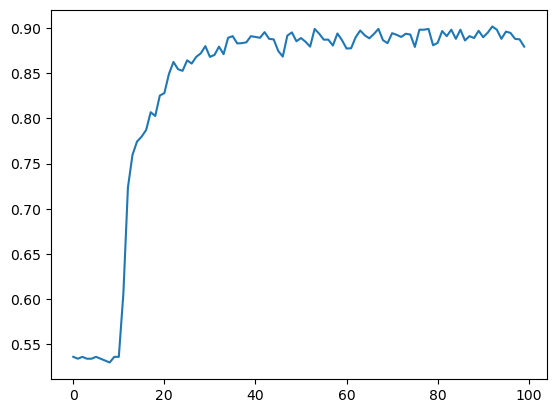

In [8]:
print('Finished Training')


plt.plot(epochs_F1List[0])
print(epochs_F1List[0].max())

ind = np.where(epochs_F1List[0]==epochs_F1List[0].max())
print(epochs_F1List[1][ind])
plt.savefig("f1.png")

In [40]:

mcr = MulticlassRecall(num_classes=6, average=None)
mccm = MulticlassConfusionMatrix(num_classes=6)

net.eval()
out = None
lab = None
f1_list = np.zeros(len(dl_test))
running_loss = 0.0
for i, data in enumerate(dl_test, 0):
    inputs, labels = data
    # forward + backward + optimize
    outputs = net(inputs)


    if out is None:
        out = outputs.detach()
    else:
        out = np.vstack((out, outputs.detach()))

    if lab is None:
        lab = labels.detach()
    else:
        lab = np.hstack((lab, labels.detach()))
    f1_list[i] = F1(outputs, labels).item()
    if i % 10 == 9:    # print every 10 mini-batches
        print(f"[batch {i}, size: {dl_test.batch_size}] F1 score: {f1_list[i]}")

print(mcr(torch.Tensor(out), torch.Tensor(lab)))
print(mccm(torch.Tensor(out), torch.Tensor(lab)))

[batch 9, size: 20] F1 score: 0.949999988079071
[batch 19, size: 20] F1 score: 0.8500000238418579
[batch 29, size: 20] F1 score: 0.8999999761581421
[batch 39, size: 20] F1 score: 0.8999999761581421
[batch 49, size: 20] F1 score: 0.8500000238418579
tensor([0.7297, 0.3226, 0.9628, 0.1250, 0.8755, 0.8313])
tensor([[ 27,   0,   0,   0,   1,   9],
        [  0,  10,  19,   0,   0,   2],
        [  0,   1, 569,   0,   0,  21],
        [  0,   1,   3,   2,   7,   3],
        [  2,   1,  15,   5, 232,  10],
        [  2,   5,  19,   2,   0, 138]])


OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detec